In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time

In [11]:
def procesar_datos(ruta_csv):
    """
    Lee un archivo CSV y procesa los datos:
    - Renombra la columna 'Unnamed: 0' a 'Timestamp'.
    - Selecciona las columnas 'Timestamp' y 'GHI'.
    - Convierte la columna 'Timestamp' a tipo datetime sin zona horaria.
    - Filtra los registros para mantener solo los que están entre las 5:00 y las 18:30.

    Parámetros:
    ruta_csv (str): Ruta al archivo CSV.

    Retorna:
    pd.DataFrame: DataFrame procesado.
    """
    # Leer el archivo CSV
    df = pd.read_csv(ruta_csv)
    
    # Renombrar la columna 'Unnamed: 0' a 'Timestamp'
    df = df.rename(columns={'Unnamed: 0': 'Timestamp'})
    
    # Seleccionar las columnas deseadas
    columnas_deseadas = ['Timestamp', 'GHI']
    df = df[columnas_deseadas]
    
    # Convertir 'Timestamp' a datetime sin zona horaria
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_convert(None)
    
    # Definir las horas de inicio y fin
    hora_inicio = time(5, 0)   # 5:00 AM
    hora_fin = time(18, 30)    # 6:30 PM
    
    # Filtrar los registros que están entre las horas deseadas
    df = df[(df['Timestamp'].dt.time >= hora_inicio) & (df['Timestamp'].dt.time <= hora_fin)]
    
    return df

In [12]:
ruta_csv = 'DatosParaCompartir.csv'
procesar_datos(ruta_csv)

,Timestamp,GHI
0,2022-02-21 18:00:00,3.0352
1,2022-02-21 18:10:00,0.3562
2,2022-02-21 18:20:00,0.0000
3,2022-02-21 18:30:00,0.0000
66,2022-02-22 05:00:00,0.3184
...,...,...
107135,2024-03-06 17:50:00,11.3348
107136,2024-03-06 18:00:00,3.4991
107137,2024-03-06 18:10:00,0.3962
107138,2024-03-06 18:20:00,0.0026


In [26]:
def graficar_ghi(df, fecha_inicio, fecha_fin):
    # Hacer una copia del DataFrame original para evitar modificar el original
    df = df.copy()
    
    # Asegurarse de que 'Timestamp' está en formato datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Filtrar el DataFrame por el rango de fechas y hacer una copia
    df_filtrado = df[(df['Timestamp'] >= fecha_inicio) & (df['Timestamp'] <= fecha_fin)].copy()
    
    # Verificar que hay datos en el rango seleccionado
    if df_filtrado.empty:
        print("No hay datos en el rango de fechas seleccionado.")
        return
    
    # Extraer la hora de 'Timestamp' y crear una nueva columna 'Hora'
    df_filtrado['Hora'] = df_filtrado['Timestamp'].dt.time
    
    # Agrupar por 'Hora' y calcular la media de 'GHI'
    df_hora = df_filtrado.groupby('Hora', as_index=False)['GHI'].mean()
    
    # Ordenar los datos por hora
    df_hora = df_hora.sort_values('Hora')
    
    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df_hora['Hora'].astype(str), df_hora['GHI'], marker='o', label='GHI Promedio')
    plt.xlabel('Hora')
    plt.ylabel('GHI')
    plt.title(f'GHI desde {fecha_inicio} hasta {fecha_fin}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [29]:
df.to_pickle('df_GHI.plk')

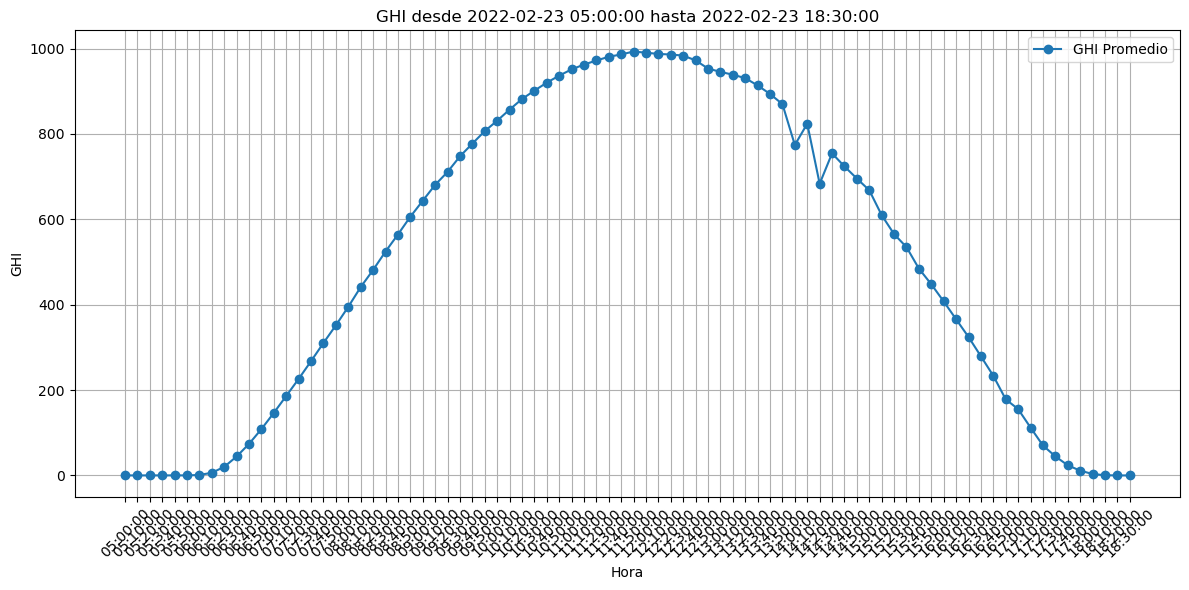

In [28]:
fecha_inicio = '2022-02-23 05:00:00'
fecha_fin = '2022-02-23 18:30:00'
graficar_ghi(df, fecha_inicio, fecha_fin)